<a href="https://colab.research.google.com/github/RBVM001/ML456/blob/TermProject/AlexNetModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    ClassId                                           SignName
0         0                                              Yield
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vehicles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                               Speed limit (20km/h)
14       14                                            

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


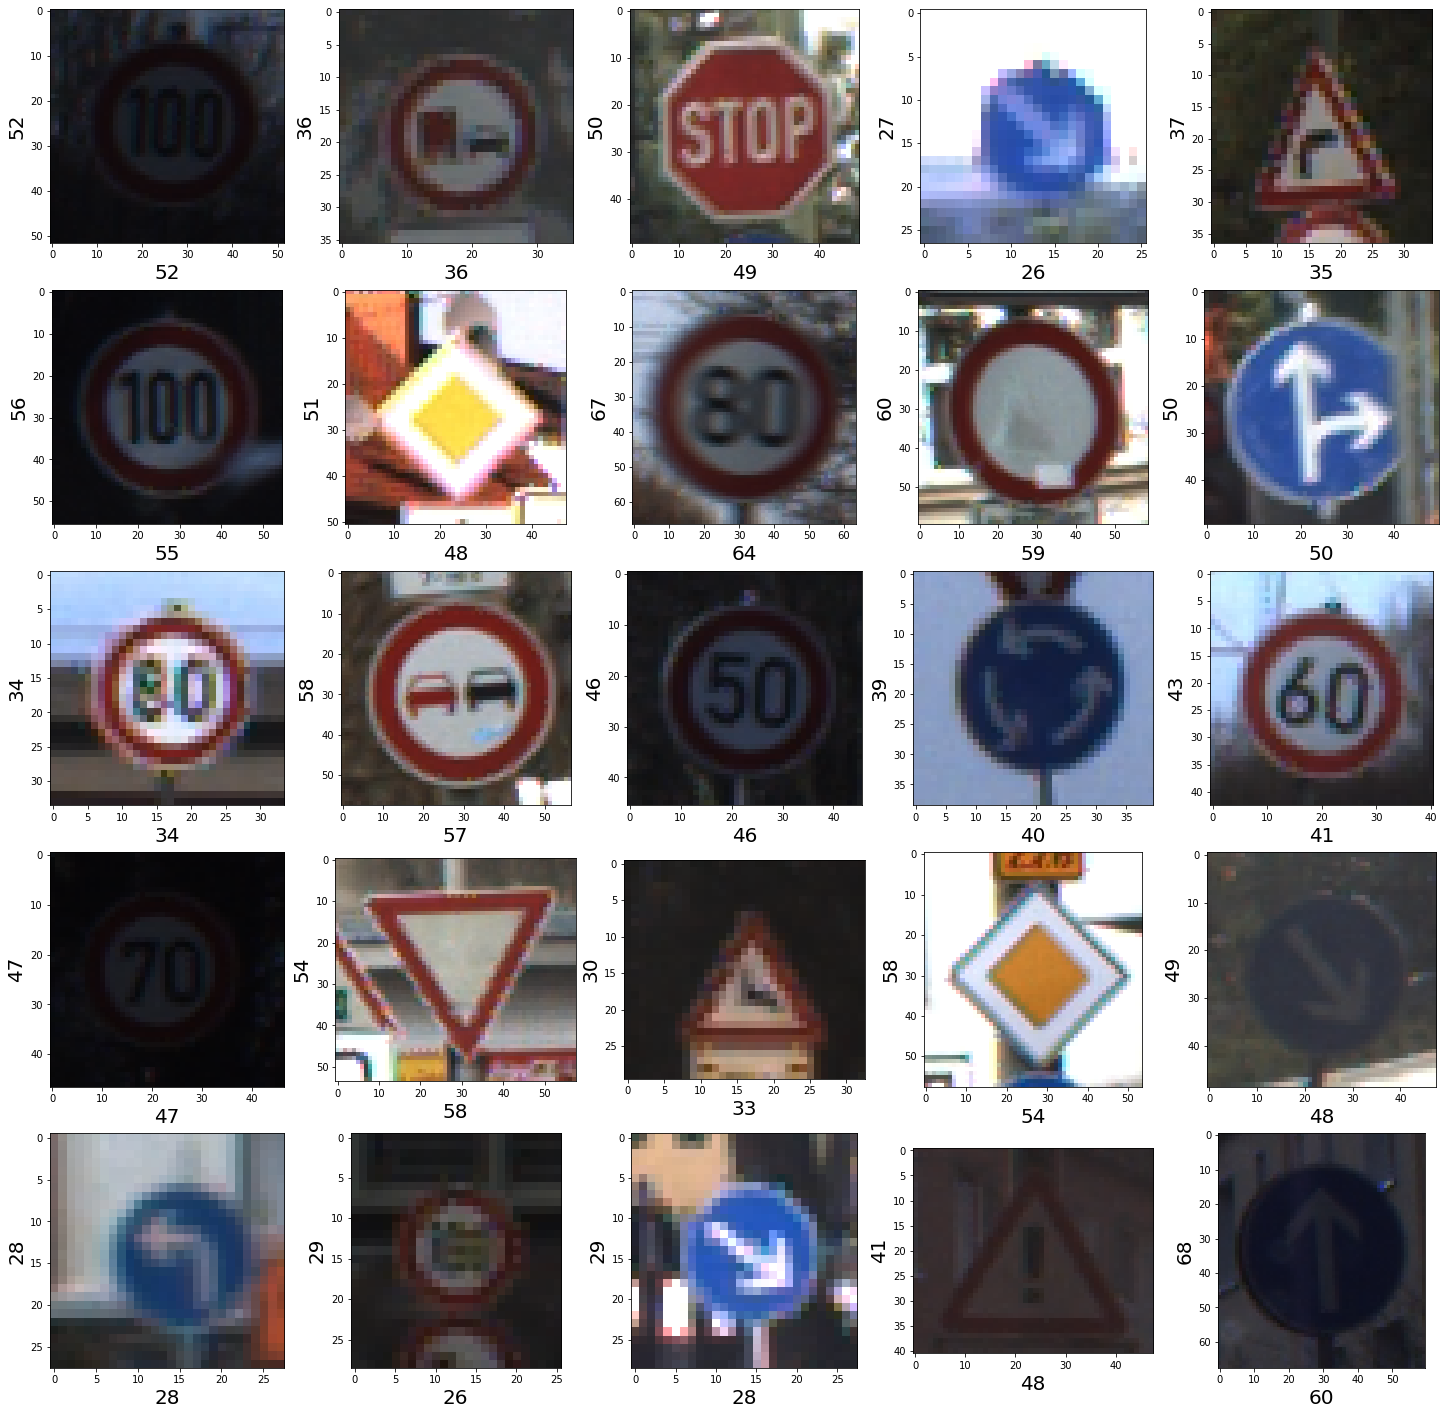

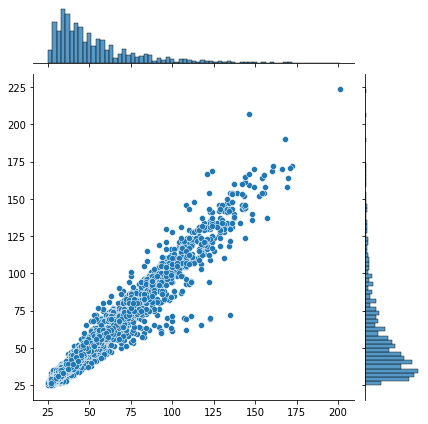

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


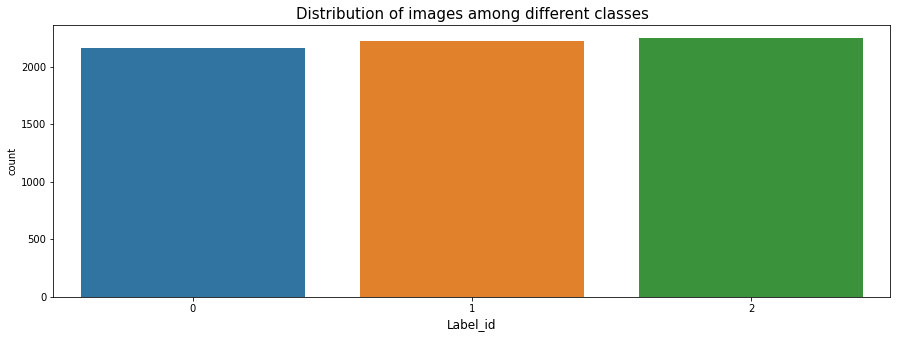

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 13, 13, 256)       1024      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 13, 13, 384)      

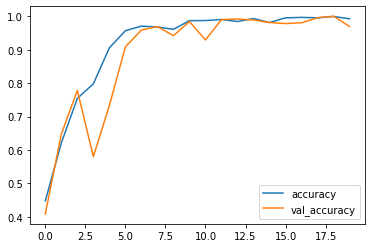

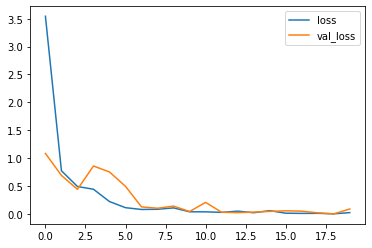

In [3]:


import pandas as pd
import tensorflow as tf
import keras
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image


lab = pd.read_csv ('/content/TrafficSigns/Labels.csv')

print(lab)

dir_path = '/content/TrafficSigns'

os.listdir(dir_path)



# Assigning the path for train and test images

train_path = dir_path + '/Train'
test_path = dir_path + '/Test'


print(sorted(os.listdir(train_path)))


sorted(os.listdir(test_path))

# Visualizing 25 random sample images from test set

images_path = os.listdir(test_path)

plt.figure(figsize=(25, 25))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    random_img_path = test_path + '/' + random.choice(images_path)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize=20)  # width of image
    plt.ylabel(rand_img.shape[0], fontsize=20)  # height of image



dim1 = []
dim2 = []

for i in range(0,3):
    labels = train_path + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

sns.jointplot(dim1, dim2)
plt.show()

np.mean(dim1)

np.mean(dim2)

# Since the mean of both dimensions is around 50 , we will use (50x50) as the shape of images.

#image_shape = (50, 50)

image_shape = (218,218)

images = []
label_id = []

for i in range(3):
    labels = train_path + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize(image_shape)
        img = np.array(img)
        images.append(img)
        label_id.append(i)


# Converting images into numpy array
images = np.array(images)

images = images / 255

label_id = np.array(label_id)
label_id.shape

images.shape

plt.figure(figsize=(15, 5))
sns.countplot(label_id)
plt.title('Distribution of images among different classes', fontsize=15)
plt.xlabel('Label_id', fontsize=12)
plt.show()


np.save('Training_set', images)
np.save('Label_Id', label_id)

# Splitting the train data into train and validation data

images = np.load('Training_set.npy')
label_id = np.load('Label_Id.npy')

# Splitting the data


x_train, x_val, y_train, y_val = train_test_split(images, label_id, test_size=0.2, random_state=3)


y_train_cat = to_categorical(y_train)

y_val_cat = to_categorical(y_val)



# Model Building


model = Sequential()

# 1st layer
#model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=x_train.shape[1:], activation='relu', padding='same'))
#model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(Dropout(0.5))

# 2nd layer
#model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
#model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(Dropout(0.5))

# 3rd layer
#model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
#model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(Dropout(0.5))

#model.add(Flatten())

# Dense layer
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))

# Output layer
#model.add(Dense(43, activation='softmax'))

#1st

model.add(Conv2D(filters=96, input_shape=x_train.shape[1:], kernel_size=(11,11),activation='relu', strides=(4,4), padding='same'))
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
model.add(BatchNormalization())
#2nd

model.add(Conv2D(filters=256, kernel_size=(5, 5),activation='relu', strides=(1,1), padding='same'))

model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
model.add(BatchNormalization())
#3rd

model.add(Conv2D(filters=384, kernel_size=(3,3),activation='relu', strides=(1,1), padding='same'))


#4th

model.add(Conv2D(filters=384, kernel_size=(3,3),activation='relu', strides=(1,1), padding='same'))

#5th

model.add(Conv2D(filters=256, kernel_size=(3,3),activation='relu', strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
model.add(Dropout(0.5))

#Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096, input_shape=x_train.shape[1:],activation='relu'))
#model.add(BatchNormalization())

# Add Dropout to prevent overfitting
model.add(Dropout(0.5))

#2nd Fully Connected Layer
model.add(Dense(4096,activation='relu'))


#3rd Fully Connected Layer
model.add(Dense(1000,activation='relu'))


#Output Layer
model.add(Dense(10,activation='softmax'))



model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



model.summary()


#early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

model.fit(

    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(x_val, y_val),
    #callbacks=[early_stopping],
    verbose=2

)

# Saving the model
model.save('Model.h5')

# Model Evaluation

evaluation = pd.DataFrame(model.history.history)

evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()



model = load_model('Model.h5')


In [1]:
from zipfile import ZipFile
TrafficSigns = '/content/TrafficSigns.zip'

with ZipFile(TrafficSigns, 'r') as zip:
  zip.extractall()
  print('done')

done
